### Project ID - #CC69852
### Project Title - Demand Forecasting for a Retail Store
### Internship Domain - Data Science Intern
### Project Level - Intermediate Level 
### Assigned By- CodeClause Internship
### Assigned To- Anush Sharma

##### Import All Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

##### Import the Dataset

In [4]:
#SD = Sales Data
SD = pd.read_csv('sales_data.csv')
SD

,Date,Sales,Product Category
0,2023-01-01,222,Electronics
1,2023-01-02,97,Books
2,2023-01-03,167,Books
3,2023-01-04,242,Electronics
4,2023-01-05,373,Electronics
...,...,...,...
726,2024-12-27,261,Clothing
727,2024-12-28,394,Clothing
728,2024-12-29,120,Clothing
729,2024-12-30,198,Electronics


##### Convert the Date column to datetime type

In [5]:
SD['Date'] = pd.to_datetime(SD['Date'])

##### Set the Date column as the index with explicit frequency

In [6]:
SD.set_index('Date', inplace=True)
SD.index.freq = 'D'

##### Explore the Data 

In [7]:
SD.head()

,Sales,Product Category
Date,,
2023-01-01,222,Electronics
2023-01-02,97,Books
2023-01-03,167,Books
2023-01-04,242,Electronics
2023-01-05,373,Electronics


##### Visualize

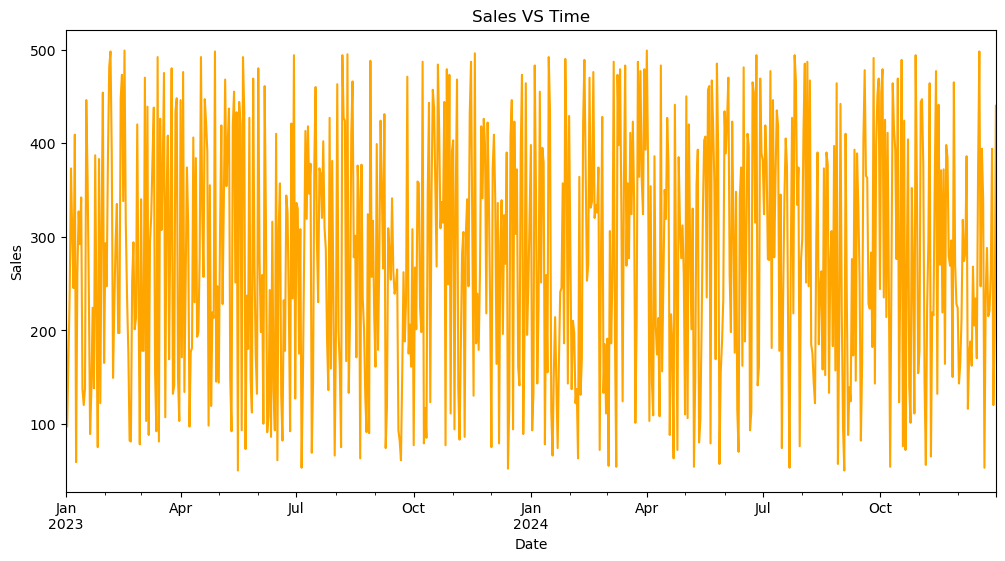

In [15]:
SD['Sales'].plot(figsize=(12, 6),c='orange')
plt.title('Sales VS Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##### Decompose the time series into trend, seasonality, and residuals

In [10]:
decomposition = seasonal_decompose(SD['Sales'], model='additive')

###### Plot the decomposed components

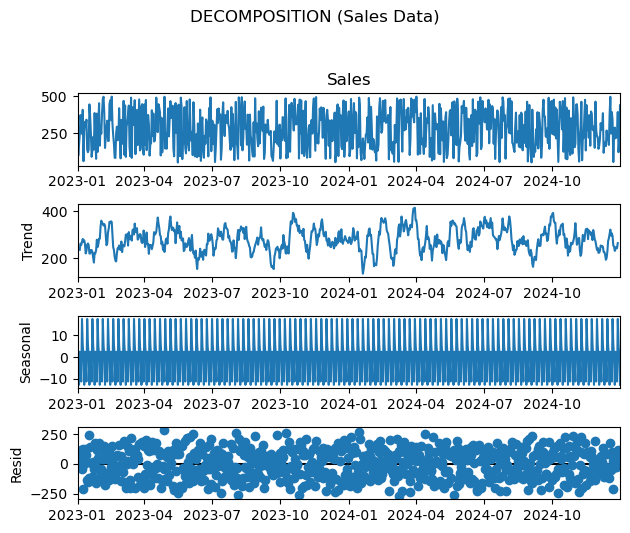

In [22]:
decomposition.plot()
plt.suptitle('DECOMPOSITION (Sales Data)' , y=1.1, c='black')
plt.show()

##### Split data --> Train & Test sets

In [26]:
train_size = int(len(SD) * 0.8)
train_data, test_data = SD.iloc[:train_size], SD.iloc[train_size:]
train_size

584

##### Build and Train the Forecasting Model 

In [25]:
model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=12).fit()
model

##### Forecast Future Demand

In [27]:
forecast = model.forecast(len(test_data))
forecast

2024-08-07    325.750347
2024-08-08    315.455279
2024-08-09    298.975350
2024-08-10    312.968570
2024-08-11    295.548764
                 ...    
2024-12-27    309.307741
2024-12-28    356.447447
2024-12-29    325.750347
2024-12-30    315.455279
2024-12-31    298.975350
Freq: D, Length: 147, dtype: float64

##### Evaluate the model

In [28]:
mse = mean_squared_error(test_data['Sales'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 17472.597527639635


#### Mean Squared Error: 17472.597527639635

##### Visualize the forecast

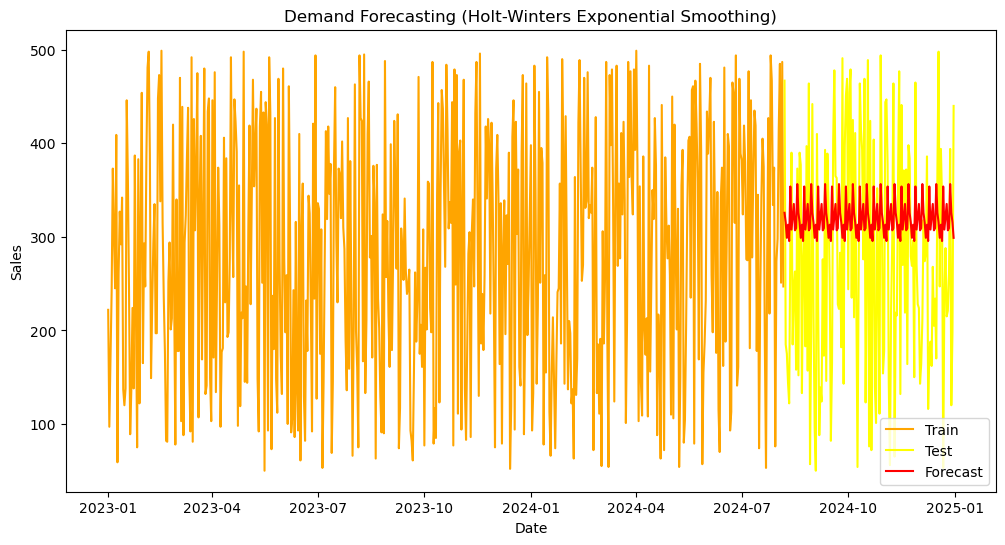

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Train', c='orange')
plt.plot(test_data.index, test_data['Sales'], label='Test', c='yellow')
plt.plot(test_data.index, forecast, label='Forecast', c='red')
plt.title('Demand Forecasting (Holt-Winters Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()